In [12]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# connect to factbook.db
conn = sqlite3.connect('factbook.db')

# show infomation on the tables in the database
q1 = """
SELECT *
FROM sqlite_master
WHERE type = 'table'
;
"""
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [5]:
# show the first 5 rows of the facts table in the database
q2 = """
SELECT *
FROM facts
LIMIT 5
;
"""
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [6]:
# return minimum population
q3 = """
SELECT name, MIN(population)
FROM facts
;
"""
pd.read_sql_query(q3, conn)

,name,MIN(population)
0,Antarctica,0


In [7]:
# return maxmimu population
q4 = """
SELECT name, MAX(population)
FROM facts
;
"""
pd.read_sql_query(q4, conn)

,name,MAX(population)
0,World,7256490011


In [8]:
# return minimum population growth
q5 = """
SELECT name, MIN(population_growth)
FROM facts
;
"""
pd.read_sql_query(q5, conn)

,name,MIN(population_growth)
0,Holy See (Vatican City),0.0


In [9]:
# return maximum population growth
q6 = """
SELECT name, MAX(population_growth)
FROM facts
;
"""
pd.read_sql_query(q6, conn)

,name,MAX(population_growth)
0,South Sudan,4.02


In [10]:
# return the countries with a population of 0
q7 = """
SELECT name
FROM facts
WHERE population = 0
;
"""
pd.read_sql_query(q7, conn)

,name
0,Antarctica


In [11]:
# return the countries with a population of 0
q8 = """
SELECT name
FROM facts
WHERE population = 7256490011
;
"""
pd.read_sql_query(q8, conn)

,name
0,World


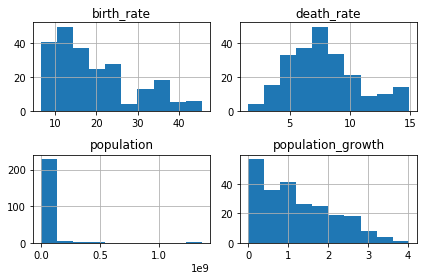

In [16]:
# generate histograms for the following columns: population, population_growth, birth_rate, death_rate
q9 = """
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (SELECT MAX(population) FROM facts) AND
      population != (SELECT MIN(population) FROM facts)
;
"""
pd.read_sql_query(q9, conn).hist()
plt.tight_layout()
plt.show()

In [23]:
# Which countries have the highest population density?
q10 = """
SELECT name, MAX(CAST(population as float)/ CAST(area_land as float))
FROM facts
;
"""
pd.read_sql_query(q10, conn)

,name,MAX(CAST(population as float)/ CAST(area_land as float))
0,Macau,21168.964286


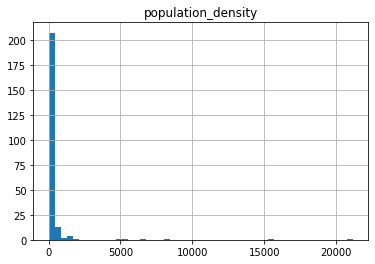

In [47]:
# Generate a histogram of population densities.
q11 = """
SELECT CAST(population as float)/ CAST(area_land as float) AS population_density
FROM facts
;
"""
pd.read_sql_query(q11, conn).hist(bins=50)
plt.show()

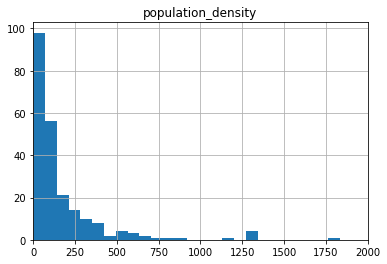

In [55]:
# limit the histogram in order to look at lower density range
pd.read_sql_query(q11, conn).hist(bins=300)
plt.xlim(0, 2000)
plt.show()

In [60]:
# Which countries have the highest ratios of water to land?
q12 = """
SELECT name, CAST(area_water as float)/ CAST(area as float) AS water_to_land
FROM facts
ORDER BY water_to_land DESC
LIMIT 10
;
"""
pd.read_sql_query(q12, conn)

,name,water_to_land
0,British Indian Ocean Territory,0.998897
1,Virgin Islands,0.818848
2,Puerto Rico,0.356827
3,"Bahamas, The",0.278818
4,Guinea-Bissau,0.221592
5,Malawi,0.205969
6,Netherlands,0.184147
7,Uganda,0.182287
8,Eritrea,0.141156
9,Liberia,0.135127


In [64]:
# Which countries have more water than land?
q13 = """
SELECT name, CAST(area_water as float)/ CAST(area as float) AS water_to_land
FROM facts
WHERE water_to_land >= 0.5
ORDER BY water_to_land DESC
;
"""
pd.read_sql_query(q13, conn)

,name,water_to_land
0,British Indian Ocean Territory,0.998897
1,Virgin Islands,0.818848
